In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Diplom/first_images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: first_images/moscow_image_0003656.jpg  
  inflating: first_images/moscow_image_0002548.jpg  
  inflating: first_images/moscow_image_0005227.jpg  
  inflating: first_images/moscow_image_0005541.jpg  
  inflating: first_images/moscow_image_0004887.jpg  
  inflating: first_images/moscow_image_0003130.jpg  
  inflating: first_images/moscow_image_0000439.jpg  
  inflating: first_images/moscow_image_0001727.jpg  
  inflating: first_images/moscow_image_0001733.jpg  
  inflating: first_images/moscow_image_0005555.jpg  
  inflating: first_images/moscow_image_0004893.jpg  
  inflating: first_images/moscow_image_0003124.jpg  
  inflating: first_images/moscow_image_0003642.jpg  
  inflating: first_images/moscow_image_0005233.jpg  
  inflating: first_images/moscow_image_0001055.jpg  
  inflating: first_images/moscow_image_0003905.jpg  
  inflating: first_images/moscow_image_0001874.jpg  
  inflating: first_images/mosco

In [4]:
df_new = pd.read_csv('/content/drive/MyDrive/Diplom/Moscow-data.csv')
df_new = df_new.drop(columns = ['Unnamed: 0'])

torch.Size([3, 444, 640])


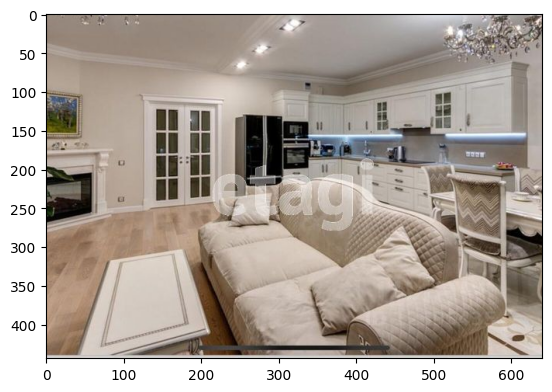

In [5]:
import matplotlib.pyplot as plt
img = torchvision.io.read_image('first_images/moscow_image_0002983.jpg') / 255
print(img.shape)
plt.imshow(img.permute(1, 2, 0), cmap='gray')

In [6]:
len(df_new)

5793

In [7]:
df_new['Repair_types_id'] = df_new['Repair_types_id'].apply(int)

In [8]:
df_new.sample(4)

,first_image_link,art_link,all_view_num,today_view_num,repair_type,date_string,price,images_links,room_num,parcing_date,region,im_dir,Repair_types_id,creature_date,display_days,avg_views
5235,https://cdn-p.cian.site/images/82/271/141/kvar...,https://www.cian.ru/sale/flat/278229916/,1 372,3,Дизайнерский,1372 просмотра с даты создания объявления 13.0...,160000000,['https://cdn-p.cian.site/images/82/271/141/kv...,4,20.04.2023,1,first_images/moscow_image_0005252.jpg,1,13.09.2022,219,6.264840
4628,https://cdn-p.cian.site/images/32/327/761/1677...,https://www.cian.ru/sale/flat/283147901/,1 423,4,Дизайнерский,1423 просмотра с даты создания объявления 01.0...,325000000,['https://cdn-p.cian.site/images/32/327/761/16...,4,20.04.2023,1,first_images/moscow_image_0004639.jpg,1,01.02.2023,78,18.243590
5492,https://cdn-p.cian.site/images/03/664/551/kvar...,https://www.cian.ru/sale/flat/284510464/,486,4,Дизайнерский,486 просмотров с даты создания объявления 06.0...,125000000,['https://cdn-p.cian.site/images/03/664/551/kv...,4,20.04.2023,1,first_images/moscow_image_0005510.jpg,1,06.03.2023,45,10.800000
554,https://cdn-p.cian.site/images/55/346/761/1676...,https://www.cian.ru/sale/flat/285812320/,122,13,Косметический,122 просмотра с даты создания объявления 05.04...,10000000,['https://cdn-p.cian.site/images/55/346/761/16...,1,19.04.2023,1,first_images/moscow_image_0000554.jpg,3,05.04.2023,14,8.714286


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new['im_dir'], df_new['Repair_types_id'], test_size=0.15, random_state=42, stratify = df_new['Repair_types_id'])

In [10]:
X_train, y_train

(3764    first_images/moscow_image_0003770.jpg
 3587    first_images/moscow_image_0003593.jpg
 1645    first_images/moscow_image_0001649.jpg
 115     first_images/moscow_image_0000115.jpg
 1782    first_images/moscow_image_0001786.jpg
                         ...                  
 4725    first_images/moscow_image_0004736.jpg
 261     first_images/moscow_image_0000261.jpg
 2212    first_images/moscow_image_0002216.jpg
 2868    first_images/moscow_image_0002872.jpg
 3313    first_images/moscow_image_0003318.jpg
 Name: im_dir, Length: 4924, dtype: object,
 3764    2
 3587    3
 1645    1
 115     3
 1782    2
        ..
 4725    1
 261     1
 2212    2
 2868    2
 3313    1
 Name: Repair_types_id, Length: 4924, dtype: int64)

In [11]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y=None, transform=None):
        self.const_dir = 'im_data/image_'
        self.transform = transform
        self.num_elem = len(X)
        self.X = X
        self.target = y

    def __getitem__(self, idx):
#         im_name = self.const_dir + str(idx).zfill(4) + '.jpg'
        image = torchvision.io.read_image(self.X.iloc[idx]) / 255

        if (self.transform is not None):
            image = self.transform(image)
        if (self.target is not None):
            # return image, torch.Tensor(self.X.iloc[idx][['Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']])
            return image, self.target.iloc[idx]
        return image
    
    def __len__(self):
        return self.num_elem

In [12]:
import torchvision.transforms as T

train_transform = nn.Sequential(
    # T.CenterCrop(300),
    T.RandomCrop(240),
    T.ColorJitter(brightness=.1),
    # T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 1)),
    T.Resize(256),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
)

test_transform = nn.Sequential(
    T.CenterCrop(240),
    T.Resize(256),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
)

In [13]:
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
transforms = EfficientNet_B1_Weights.IMAGENET1K_V1.transforms()
transforms

ImageClassification(
    crop_size=[240]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [14]:
train_dataset = MyDataset(X_train, y_train, transform=train_transform)
test_dataset = MyDataset(X_test, y_test, transform=test_transform)

batch_size=32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [15]:
train_dataset[0][0].shape

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 256, 256])

torch.Size([3, 256, 256])


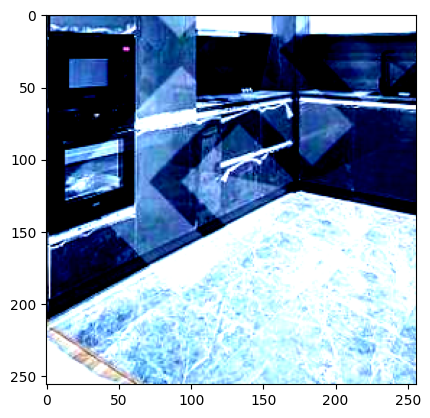

In [16]:
img = train_dataset[7][0]
print(img.shape)
plt.imshow(img.permute(1, 2, 0), cmap='gray')

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [18]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=False, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
    
        BCE_loss = nn.CrossEntropyLoss()(inputs, targets)

        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

In [19]:
from tqdm.notebook import tqdm
# from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from IPython.display import clear_output

def train_epoch(model, optimizer):
    loss_log, roc_auc_log = [], []
    model.train()
    # progress_bar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}')
    i = 0
    for x_batch, y_batch in tqdm(train_loader):
#         if i > 10:
#             break
#         print(i)
        data = x_batch.to(device)
        target = y_batch.to(device)

        optimizer.zero_grad()
        output = model(data)
#         print(output, y_batch)
#         break
        roc_auc = 0
        with torch.no_grad():
            try:
                roc_auc = roc_auc_score(y_batch.cpu().detach().numpy(), nn.functional.softmax(output, -1).cpu().detach().numpy(), multi_class='ovr')
            except:
                pass
            roc_auc_log.append(roc_auc)

        loss = FocalLoss()(output, target)
        # loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)
        i += 1
    return loss_log, roc_auc_log

def test(model):
    # model.to(device)
    loss_log, roc_auc_log = [], []
    model.eval()
    i = 0
    for x_batch, y_batch in tqdm(test_loader):
#         if i > 10:
#             break
#         print(i)
        data = x_batch.to(device)
        target = y_batch.to(device)

        output = model(data)
        loss = FocalLoss()(output, target)
        # loss = criterion(output, target)
        roc_auc = 0
        with torch.no_grad():
            try:
                roc_auc = roc_auc_score(y_batch.cpu().detach().numpy(), nn.functional.softmax(output, -1).cpu().detach().numpy(), multi_class='ovr')
            except:
                pass
            roc_auc_log.append(roc_auc)
        
        loss = loss.item()
        loss_log.append(loss)
        i += 1
    return loss_log, roc_auc_log

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    
    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()
    
def train(model, opt, n_epochs):
    hist = []
    model.to(device)
    train_log, train_roc_auc_log = [], []
    val_log, val_roc_auc_log = [], []

    batchsize = 32

    for epoch in range(n_epochs):
        print("Epoch {} of {}".format(epoch, n_epochs))
        train_loss, train_roc_auc = train_epoch(model, opt)

        val_loss, val_roc_auc = test(model)

        train_log.extend(train_loss)
        train_roc_auc_log.extend(train_roc_auc)

        steps = len(X_train) / batchsize
        val_log.append((steps * (epoch + 1), np.mean(val_loss)))
        val_roc_auc_log.append((steps * (epoch + 1), np.mean(val_roc_auc)))

        clear_output()
        plot_history(train_log, val_log)    
        plot_history(train_roc_auc_log, val_roc_auc_log, title='roc_auc')
        print("Epoch {} roc_auc = {:.2%}".format(epoch, val_roc_auc_log[-1][1]))
        hist += [(epoch, val_roc_auc_log[-1][1])]
#         torch.save(model, './model_regnet_AdamW1' + str(epoch) + '.pth')
    
    for epoch, auc in hist:
        print(epoch, ': ', auc)
            
    print("Final roc_auc: {:.2%}".format(val_roc_auc_log[-1][1]))

In [20]:
# !pip install --upgrade pip

In [27]:
import torchvision
from torchvision.models import efficientnet_b1, EfficientNet_B1_Weights
import torch.nn as nn

def count_parameters(model):
    model_parameters = filter(lambda p: p.requires_grad, model.parameters())
    return sum([np.prod(p.size()) for p in model_parameters])

model = efficientnet_b1(weights=EfficientNet_B1_Weights.IMAGENET1K_V1)
model.classifier = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=4, bias=True)
)
print("Total number of trainable parameters:", count_parameters(model))
for name, param in model.named_parameters():
    if name == 'features.4.1.block.0.1.weight':
        break
    else:
        param.requires_grad = False
    # if name != 'classifier.1.weight' and name != 'classifier.1.bias':
    #     param.requires_grad = False
    # else:
    #     param.requires_grad = True

Total number of trainable parameters: 6518308


In [28]:
# for name, param in model.named_parameters():
#     # if name == 'features.7.0.block.0.0.weight':
#     #     break
#     print(name)

In [29]:
import warnings
warnings.filterwarnings("ignore")

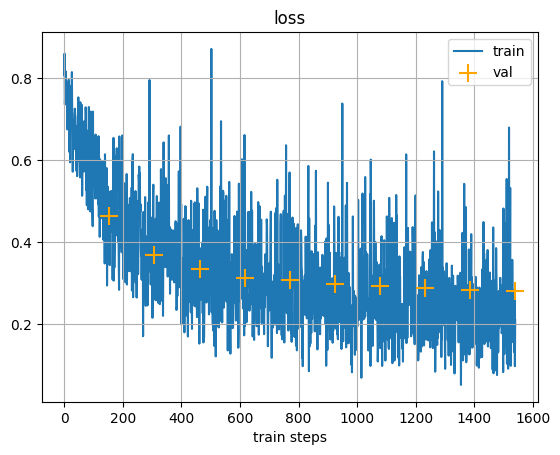

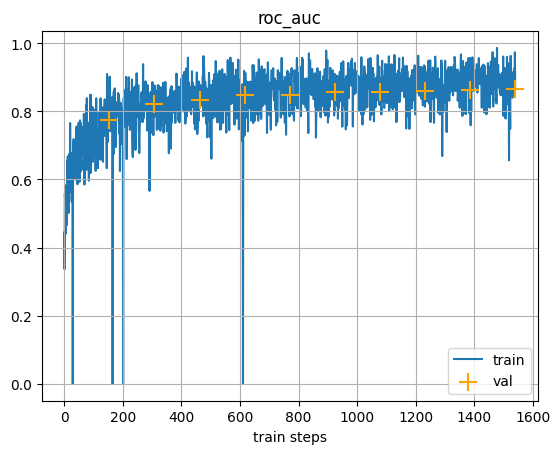

Epoch 9 roc_auc = 86.42%
0 :  0.7733648780242499
1 :  0.8208188263718484
2 :  0.8344982349953802
3 :  0.8466295931782921
4 :  0.8480646569350121
5 :  0.855974973173984
6 :  0.8580460020053813
7 :  0.8606516078563092
8 :  0.8622426211078208
9 :  0.8641920394702927
Final roc_auc: 86.42%


In [30]:
opt = torch.optim.AdamW(model.parameters(), lr=0.00005)
criterion = nn.CrossEntropyLoss()
train(model, opt, 10)

In [ ]:
torch.save(model, './eff_net_model_86_48')

In [ ]:
# model = net.load_state_dict(torch.load('./eff_net_model_86_48', map_location=torch.device('cpu')))
model = torch.load('./eff_net_model_86_48', map_location ='cpu')

In [31]:
train_dataset = MyDataset(X_train, y_train, transform=train_transform)
test_dataset = MyDataset(X_test, y_test, transform=test_transform)

batch_size=1
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [34]:
from tqdm.notebook import tqdm
predictions = np.array([])
true_labels = np.array([])
for x_batch, y_batch in tqdm(test_loader):
    data = x_batch.to(device)
    target = y_batch.cpu().numpy()
    output = model(data)
    preds = np.argmax(nn.functional.softmax(output).cpu().detach().numpy(), 1)
    predictions = np.append(predictions, preds)
    true_labels = np.append(true_labels, target)

  0%|          | 0/869 [00:00<?, ?it/s]

In [35]:
df = pd.DataFrame(
    {
        'preds': predictions,
        'target': true_labels
    }
)

In [36]:
df['is_true'] = df['target'] == df['preds']

In [37]:
df

,preds,target,is_true
0,1.0,0.0,False
1,1.0,1.0,True
2,1.0,1.0,True
3,2.0,2.0,True
4,1.0,3.0,False
...,...,...,...
864,3.0,3.0,True
865,0.0,0.0,True
866,1.0,2.0,False
867,1.0,1.0,True


In [38]:
df[df['is_true'] == True].shape

(577, 3)

In [39]:
df[df['is_true'] == False].shape

(292, 3)

In [40]:
df.groupby(by='target').mean()[['is_true']]

,is_true
target,
0.0,0.847826
1.0,0.744108
2.0,0.372781
3.0,0.566474
